# STEP 5: Plot the Veery observations by month

First thing first – let’s load your stored variables and import
libraries.

In [2]:
%store -r

<Axes: xlabel='month', ylabel='norm_occurrences'>

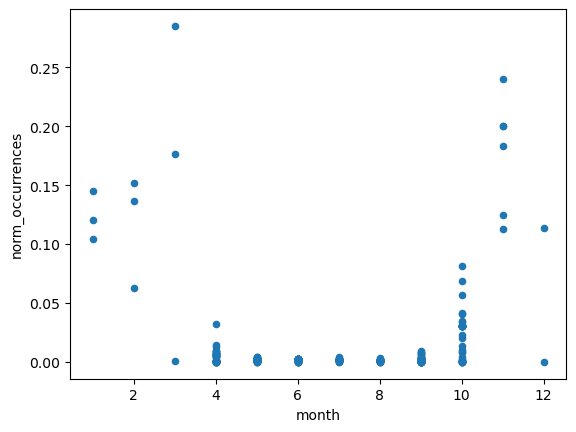

In [2]:
occurrence_df.reset_index().plot.scatter(
    x='month', y='norm_occurrences'
)

<Axes: xlabel='month', ylabel='occurrences'>

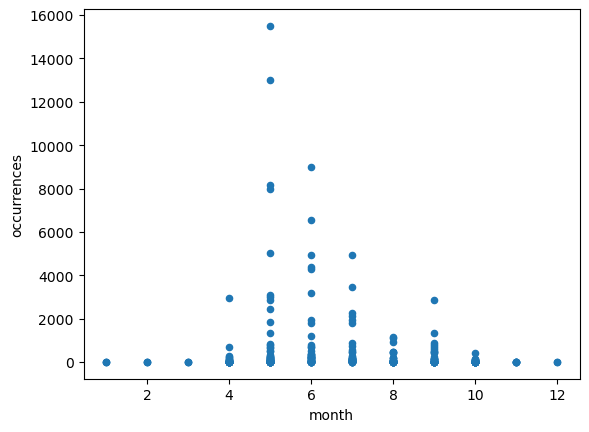

In [3]:
#plot the original occurence count, non-normalized
occurrence_df.reset_index().plot.scatter(
    x='month', y='occurrences'
)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>In the imports cell, we’ve included some packages that you will need.
Add imports for packages that will help you:</p>
<ol type="1">
<li>Make interactive maps with vector data</li>
</ol></div></div>

In [4]:
# Get month names
import calendar

# Libraries for Dynamic mapping
import cartopy.crs as ccrs
import hvplot.pandas
import panel as pn

In [5]:
import hvplot.pandas

### Create a simplified `GeoDataFrame` for plotting

Plotting larger files can be time consuming. The code below will
streamline plotting with `hvplot` by simplifying the geometry,
projecting it to a Mercator projection that is compatible with
`geoviews`, and cropping off areas in the Arctic.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Simplify ecoregion data</div></div><div class="callout-body-container callout-body"><p>Download and save ecoregion boundaries from the EPA:</p>
<ol type="1">
<li>Simplify the ecoregions with <code>.simplify(.05)</code>, and save
it back to the <code>geometry</code> column.</li>
<li>Change the Coordinate Reference System (CRS) to Mercator with
<code>.to_crs(ccrs.Mercator())</code></li>
<li>Use the plotting code that is already in the cell to check that the
plotting runs quickly (less than a minute) and looks the way you want,
making sure to change <code>gdf</code> to YOUR <code>GeoDataFrame</code>
name.</li>
</ol></div></div>

In [5]:
# Simplify the geometry to speed up processing

# Change the CRS to Mercator for mapping

# Check that the plot runs in a reasonable amount of time
gdf.hvplot(geo=True, crs=ccrs.Mercator())

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Map migration over time</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>If applicable, replace any variable names with the names you defined
previously.</li>
<li>Replace <code>column_name_used_for_ecoregion_color</code> and
<code>column_name_used_for_slider</code> with the column names you wish
to use.</li>
<li>Customize your plot with your choice of title, tile source, color
map, and size.</li>
</ol>
<div data-__quarto_custom="true" data-__quarto_custom_type="Callout"
data-__quarto_custom_context="Block" data-__quarto_custom_id="3">
<div data-__quarto_custom_scaffold="true">

</div>
<div data-__quarto_custom_scaffold="true">
<p>Your plot will probably still change months very slowly in your
Jupyter notebook, because it calculates each month’s plot as needed.
Open up the saved HTML file to see faster performance!</p>
</div>
</div></div></div>

In [7]:
# Join the occurrences with the plotting GeoDataFrame
occurrence_gdf = ecoregions_gdf.join(occurrence_df)

# Get the plot bounds so they don't change with the slider
xmin, ymin, xmax, ymax = occurrence_gdf.total_bounds

# Plot occurrence by ecoregion and month
migration_plot = (
    occurrence_gdf
    .hvplot(
        c=column_name_used_for_shape_color,
        groupby=column_name_used_for_slider,
        # Use background tiles
        geo=True, crs=ccrs.Mercator(), tiles='CartoLight',
        title="Your Title Here",
        xlim=(xmin, xmax), ylim=(ymin, ymax),
        frame_height=600,
        widget_location='bottom'
    )
)

# Save the plot
migration_plot.save('migration.html', embed=True)

# Show the plot
migration_plot

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?: Fix the month labels</div></div><div class="callout-body-container callout-body"><p>Notice that the <code>month</code> slider displays numbers instead of
the month name. Use <code>pn.widgets.DiscreteSlider()</code> with the
<code>options=</code> parameter set to give the months names. You might
want to try asking ChatGPT how to do this, or look at the documentation
for <code>pn.widgets.DiscreteSlider()</code>. This is pretty tricky!</p></div></div>